In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV, Lasso
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('df_above_med.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,genre,name,platform,ratings,release_date,total_sales,time_delta,year,month,Rank,Publisher,log_total_sales,games_by_publisher,total_sales_by_publisher,total_games_by_genre,publisher_Quartile(total_sales)
0,Action,Saints Row 2,X360,M,2008-10-14,3.07,3653,2008,10,462.0,THQ,1.403643,74,59.13,342,75%_Publisher
1,Action,Rugrats in Paris: The Movie,PS,E,2000-10-29,3.52,6560,2000,10,368.0,THQ,1.508512,74,59.13,342,75%_Publisher
2,Action,Dynasty Warriors 3,PS2,T,2001-11-26,1.87,6167,2001,11,923.0,THQ,1.054312,74,59.13,342,75%_Publisher
3,Action,Saints Row 2,PS3,M,2008-10-14,1.68,3653,2008,10,462.0,THQ,0.985817,74,59.13,342,75%_Publisher
4,Action,The Incredibles,GBA,E,2004-10-31,2.06,5097,2004,10,668.0,THQ,1.118415,74,59.13,342,75%_Publisher


# Vintage
Change genre for all games released before 1995 to 'vintage'

In [4]:
def func_vintage(row):
    if row['year'] <= 1995:
        return 'Vintage'
    else:
        return row['genre']
df['genre'] = df.apply(func_vintage, axis=1)

# Video Games in use

In [5]:
def platform_edit(row):
    if row['platform'] == 'GC':
        return 'GB'
    else:
        return row['platform']
df['platform'] = df.apply(platform_edit, axis=1)

In [6]:
consoles = ['PS2', 'DS,GB', 'PS', 'Wii', 'X360', 'PS3', 'PS4', 'PSP', 'GBA', '3DS', 'NES', 'SNES', 
'XOne', 'N64', 'NS', 'WiiU', 'PSV', 'DC']
df['console_check'] = df['platform'].isin(consoles)

In [7]:
df = df[df['console_check'] != False]

In [8]:
def platform_edit2(row):
    if row['platform'] == 'PS2':
        return 155
    if row['platform'] == 'N64':
        return 33
    if row['platform'] == 'XOnes':
        return 39
    if row['platform'] == 'SNES':
        return 49
    if row['platform'] == 'NES':
        return 62
    if row['platform'] == '3DS':
        return 73
    if row['platform'] == 'GBA':
        return 81
    if row['platform'] == 'PSP':
        return 82
    if row['platform'] == 'PS4':
        return 82
    if row['platform'] == 'PS3':
        return 84
    if row['platform'] == 'X360':
        return 84
    if row['platform'] == 'Wii':
        return 101
    if row['platform'] == 'PS':
        return 102
    if row['platform'] == 'GB':
        return 118
    if row['platform'] == 'DS':
        return 154
    if row['platform'] == 'WiiU':
        return 14
    if row['platform'] == 'PSV':
        return 12
    if row['platform'] == 'DC':
        return 9
    
df['platform_sales(mi)'] = df.apply(platform_edit2, axis=1)

In [ ]:
# def platform_edit3(row):
#     if row['platform'] == 'PS2':
#         return 2000
#     if row['platform'] == 'N64':
#         return 1996
#     if row['platform'] == 'XOnes':
#         return 2013
#     if row['platform'] == 'SNES':
#         return 1990
#     if row['platform'] == 'NES':
#         return 1983
#     if row['platform'] == '3DS':
#         return 2001
#     if row['platform'] == 'GBA':
#         return 2001
#     if row['platform'] == 'PSP':
#         return 2004
#     if row['platform'] == 'PS4':
#         return 2013
#     if row['platform'] == 'PS3':
#         return 2006
#     if row['platform'] == 'X360':
#         return 2005
#     if row['platform'] == 'Wii':
#         return 2006
#     if row['platform'] == 'PS':
#         return 1994
#     if row['platform'] == 'GB':
#         return 1989
#     if row['platform'] == 'DS':
#         return 2004
#     if row['platform'] == 'WiiU':
#         return 2012
#     if row['platform'] == 'PSV':
#         return 2011
#     if row['platform'] == 'DC':
#         return 1998
    
# df['platform_release'] = df.apply(platform_edit3, axis=1)

In [9]:
df.count()

genre                              1772
name                               1772
platform                           1772
ratings                            1759
release_date                       1772
total_sales                        1772
time_delta                         1772
year                               1772
month                              1772
Rank                               1772
Publisher                          1772
log_total_sales                    1772
games_by_publisher                 1772
total_sales_by_publisher           1772
total_games_by_genre               1772
publisher_Quartile(total_sales)    1772
console_check                      1772
platform_sales(mi)                 1757
dtype: int64

In [10]:
df = df.drop(columns='console_check')

In [11]:
df.head()

,genre,name,platform,ratings,release_date,total_sales,time_delta,year,month,Rank,Publisher,log_total_sales,games_by_publisher,total_sales_by_publisher,total_games_by_genre,publisher_Quartile(total_sales),platform_sales(mi)
0,Action,Saints Row 2,X360,M,2008-10-14,3.07,3653,2008,10,462.0,THQ,1.403643,74,59.13,342,75%_Publisher,84.0
1,Action,Rugrats in Paris: The Movie,PS,E,2000-10-29,3.52,6560,2000,10,368.0,THQ,1.508512,74,59.13,342,75%_Publisher,102.0
2,Action,Dynasty Warriors 3,PS2,T,2001-11-26,1.87,6167,2001,11,923.0,THQ,1.054312,74,59.13,342,75%_Publisher,155.0
3,Action,Saints Row 2,PS3,M,2008-10-14,1.68,3653,2008,10,462.0,THQ,0.985817,74,59.13,342,75%_Publisher,84.0
4,Action,The Incredibles,GBA,E,2004-10-31,2.06,5097,2004,10,668.0,THQ,1.118415,74,59.13,342,75%_Publisher,81.0


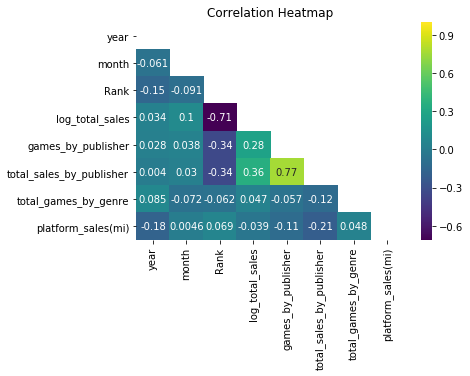

In [13]:
mask = np.triu(np.array(np.ones(df[features].corr().shape)))
#plot a hitmap
sns.heatmap(df[features].corr(), cmap='viridis', mask=mask, annot=True)
plt.title('Correlation Heatmap')
plt.savefig("heatmap_2st.png") 
# rank and log_total_sales has a high negative correlation
#this happens because the lower the rank number, the higher the sales volume

In [14]:
df = df.dropna()

In [15]:
# Transform categorical features into values
gm = pd.get_dummies(df[['genre','platform','ratings','time_delta','year', 'month','Rank', 'Publisher','platform_sales(mi)','total_games_by_genre','games_by_publisher']]) #can just apply it to the whole df
gm['target'] = df['log_total_sales']
# gm['time_delta'] = df['time_delta']

In [16]:
X = gm.drop(columns='target')
y = gm['target']

In [17]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for final testing
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, 
                                        random_state=42)
# divide the data again, train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, 
                                        random_state=42)

In [18]:
#Linear
from sklearn.linear_model import LinearRegression

# create a regression object
lm = LinearRegression()
# train the model using the training sets
lm_fit = lm.fit(X_train,y_train)

# R2/score
train_score_linear = lm.score(X_train,y_train)
test_score_linear = lm.score(X_test,y_test)
train_score_linear, test_score_linear

(0.6280306868698899, -30359699567269.348)

In [19]:
# Standidize scale
std = StandardScaler()
std.fit(X_train)

# Apply scaler to train set
X_tr = std.transform(X_train)

# Apply the scaler to test set
X_te = std.transform(X_test)

# Apply the scaler to holdout set
X_ho = std.transform(X_holdout)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [20]:
#lasso
#dividing non-test dataset into 5 and testing automatically
reg = LassoCV(cv=5, random_state=0).fit(X_tr, y_train)
train_score_lasso = reg.score(X_tr, y_train)
test_score_lasso = reg.score(X_te, y_test)
lassocv_alpha = reg.alpha_
train_score_lasso, test_score_lasso

(0.5888149922600737, 0.5603441434103937)

In [21]:
coef_dict = {}
for coef, feat in zip(reg.coef_,X_train):
    coef_dict[feat] = coef

In [22]:
coef_dict

{'Publisher_3DO': -0.0,
 'Publisher_505 Games': 0.0,
 'Publisher_AQ Interactive': 0.0,
 'Publisher_ASC Games': 0.0,
 'Publisher_ASCII Entertainment': -0.0,
 'Publisher_Acclaim Entertainment': -0.0,
 'Publisher_Activision': 0.05082855669213451,
 'Publisher_Activision Value': 0.0,
 'Publisher_Agetec': -0.0,
 'Publisher_Aksys Games': 0.0,
 'Publisher_ArtDink': 0.0,
 'Publisher_Atari': -0.0,
 'Publisher_Atlus': 0.0,
 'Publisher_Avanquest': 0.0,
 'Publisher_BAM! Entertainment': -0.0,
 'Publisher_Banpresto': 0.0,
 'Publisher_Bethesda Softworks': 0.025364827446575432,
 'Publisher_Black Bean Games': 0.0,
 'Publisher_Capcom': -0.0,
 'Publisher_Codemasters': -0.0018694218472327835,
 'Publisher_Crave Entertainment': 0.0,
 'Publisher_D3Publisher': 0.0014846333504479625,
 'Publisher_DHM Interactive': 0.0,
 'Publisher_DTP Entertainment': -0.0,
 'Publisher_Data Design Interactive': 0.0,
 'Publisher_Deep Silver': -0.0,
 'Publisher_Disney Interactive Studios': 0.0,
 'Publisher_DreamWorks Interactive': 

In [26]:
#Ridge
lm_ridge = RidgeCV(cv=5)
ridge_fit = lm_ridge.fit(X_tr, y_train)
train_score_ridge = ridge_fit.score(X_tr, y_train)
test_score_ridge = ridge_fit.score(X_te, y_test)
hold_score_ridge = ridge_fit.score(X_ho, y_holdout)
train_score_ridge, test_score_ridge, hold_score_ridge

(0.6278404969689642, 0.5762063696760894, 0.4669387267361059)

In [27]:
#Polynomial

poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_tr), y_train)
y_pred = lm_poly.predict(poly.transform(X_te))
print("Polynomial Regression:", r2_score(y_test, y_pred))

('Polynomial Regression:', -4.6238863074085967e+21)


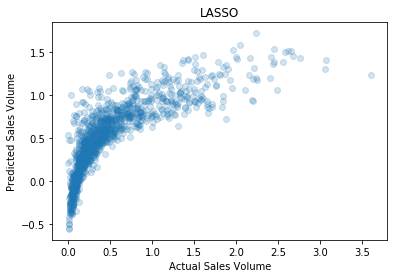

In [28]:
test_score_linear = lm_ridge.score(X_ho,y_holdout)
y_train_pred = lm_ridge.predict(X_tr)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.title('LASSO')
# plt.plot([0, 400], [0, 400])
plt.savefig("lasso_2st.png")

In [30]:
df['platform'].nunique()

14

In [31]:
df3 = df.sort_values('total_sales_by_publisher', ascending=False)